<a href="https://colab.research.google.com/github/suk404/Sukriti-Khanal/blob/main/EDA_Project_01_on_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Detailed Exploratory Analysis**


Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them in a graph making the dataset easy to interpret to the viewer. While presenting the data in a tabular format might be an option, EDA presents an snapshot of the dataset making it rather easier for the viewer the analyse the data





# **Data being explored today**
The EDA on the data of **wine quality** is performed in this notebook. To give a piece of brief information about the data set this data contains more of 6,000 rows and more than 10 columns which contains content of the wine such as fixed acidity, volatile acidity, citric acid, alcohol, sulphates and many more

# **What does this notebook contain?**
Since, we will be performing the EDA on the dataset, there are different ways of summarizing the data and contemplating the relationship of the variables with each other. This will be shown with the help of:
  
*   Univariate Analysis
*   Bivariate analysis
*   Multivariate analysis

The conclusion will contain a final analysis of the **ideal quantity of each element to produce the wine of your desired quality** will be shown as well.

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/winequalityN.csv"

In [ ]:
data_df=pd.read_csv(path)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


***Since the datatype of the dataset contains data with 64 bits which might take longer for the data processing, we can change into smaller bits for the prompt data processing.***

In [ ]:
data_df[data_df.select_dtypes(np.float64).columns] = data_df.select_dtypes(np.float64).astype(np.float16)
data_df[data_df.select_dtypes(np.int64).columns] = data_df.select_dtypes(np.int64).astype(np.int8)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float16
 2   volatile acidity      6489 non-null   float16
 3   citric acid           6494 non-null   float16
 4   residual sugar        6495 non-null   float16
 5   chlorides             6495 non-null   float16
 6   free sulfur dioxide   6497 non-null   float16
 7   total sulfur dioxide  6497 non-null   float16
 8   density               6497 non-null   float16
 9   pH                    6488 non-null   float16
 10  sulphates             6493 non-null   float16
 11  alcohol               6497 non-null   float16
 12  quality               6497 non-null   int8   
dtypes: float16(11), int8(1), object(1)
memory usage: 196.8+ KB


Checking to see if there are null or missing values in the dataset and replacing it with the mode.

In [ ]:
data_df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
data_df['fixed acidity'].fillna((data_df['fixed acidity'].mode()),inplace=True)
data_df['volatile acidity'].fillna((data_df['volatile acidity'].mode()), inplace=True)
data_df['residual sugar'].fillna((data_df['residual sugar'].mode()), inplace=True)
data_df['chlorides'].fillna((data_df['chlorides'].mode()), inplace=True)
data_df['pH'].fillna((data_df['pH'].mode()), inplace=True)
data_df['sulphates'].fillna((data_df['sulphates'].mode()), inplace=True)

In [ ]:
print(data_df.columns)
len(data_df.columns)

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


13

In [ ]:
data_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.000000,0.270020,0.360107,20.703125,0.045013,45.0,170.0,1.000977,3.000000,0.449951,8.796875,6
1,white,6.300781,0.300049,0.340088,1.599609,0.049011,14.0,132.0,0.994141,3.300781,0.489990,9.500000,6
2,white,8.101562,0.280029,0.399902,6.898438,0.049988,30.0,97.0,0.995117,3.259766,0.439941,10.101562,6
3,white,7.199219,0.229980,0.320068,8.500000,0.058014,47.0,186.0,0.995605,3.189453,0.399902,9.898438,6
4,white,7.199219,0.229980,0.320068,8.500000,0.058014,47.0,186.0,0.995605,3.189453,0.399902,9.898438,6


## **Univariate Analysis**
Univariate Analysis works by examining the effects of a singular variable on a set of data.Primarily, Univariate Analysis simply takes data and provides a summary and associated patterns.

Univariate Analysis performed in this EDA sheet:
1. Histogram
2. Normal Distribution
3. Box plot
4. Univariate bar chart


### 1. Histogram
Histogram refers to the frequency of occurrence of variables in an interval in a particular dataset. We are trying to view data distribution in each column by understanding the frewency of its occurence in the dataset. It gives us information of the:

1.   Data interval
2.   Number of observation



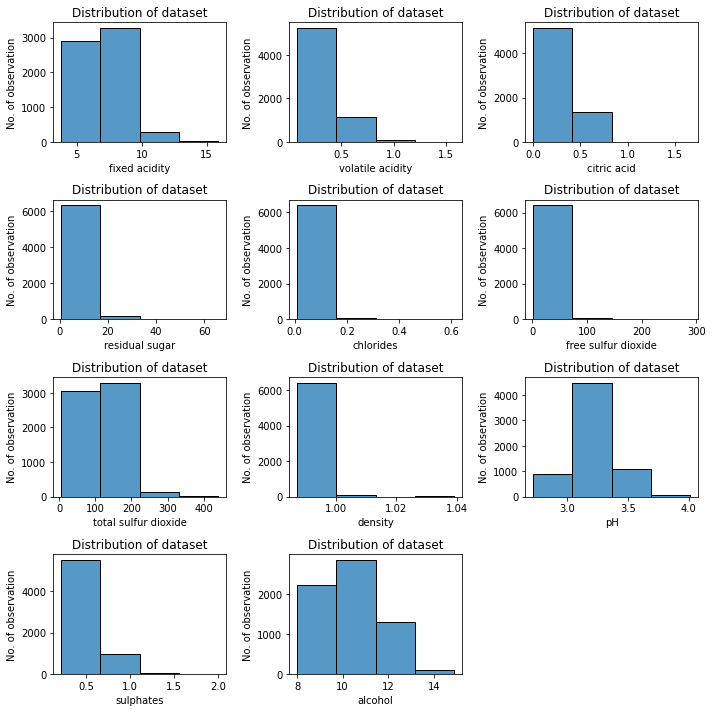

In [ ]:
plt.figure(figsize=(10,10))

for i,col in enumerate(list(data_df.columns[1:12])):
  # print(i)
  plt.subplot(4,3,i+1)
  sns.histplot(x=col,bins=4,data=data_df)
  plt.title("Distribution of dataset")
  plt.ylabel("No. of observation")
  plt.tight_layout()

### 2. Normal Distribution
It is an expression in statistics that denotes the form of presenting data by arranging the probability distribution of each value in the data.It gives us information of the:

1.   Data interval
2.   Normal Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

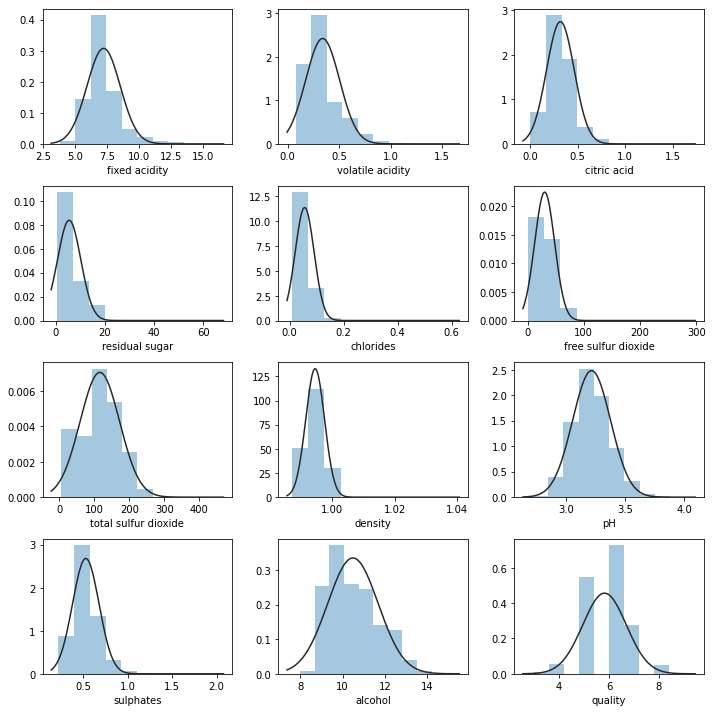

In [ ]:
from scipy.stats import norm
plt.figure(figsize=(10,10))
for j,column in enumerate(list(data_df.columns[1:13])):
  plt.subplot(4,3,j+1)
  sns.distplot(data_df[column],bins=10,fit=norm,kde=False,label='data')
  plt.tight_layout()

### 3. Box plot
Box plots are an efficient summary of one variable (univariate chart) which gives us information on the:

1.  Minimum value
2.  First quartile(Q1)
3.  Median(Q2)
4.  Maximum value of a particular dataset



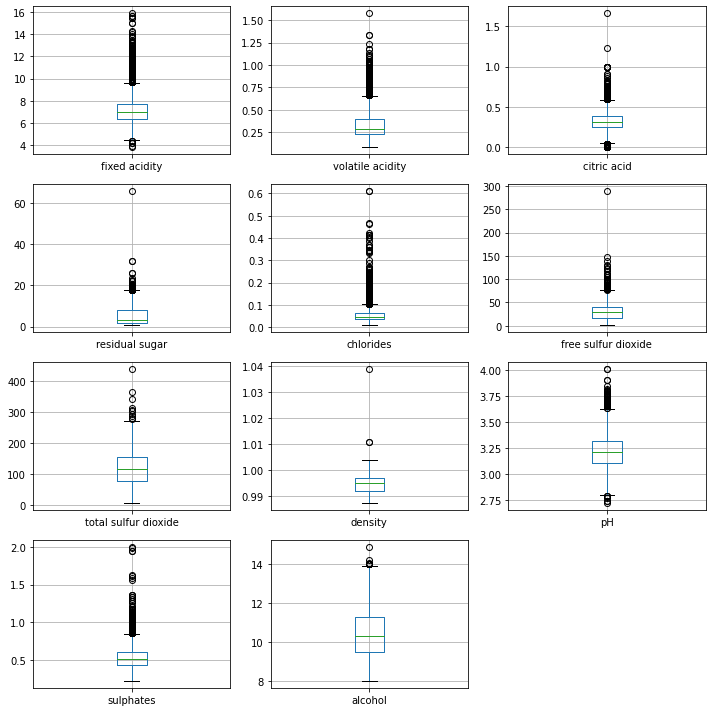

In [ ]:
plt.figure(figsize=(10,10))

for i,col in enumerate(list(data_df.columns[1:12])):
  # print(i)
  plt.subplot(4,3,i+1)
  data_df.boxplot(col)
  plt.tight_layout()

### 4. Univariate Bar chart
The univariate bar chart is a data visualization plot of a single variable on a two-dimensional axis.

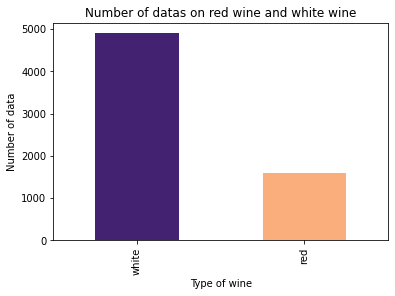

In [ ]:
counts=data_df['type'].value_counts().plot(kind='bar',color=['#432371',"#FAAE7B"])
plt.title('Number of datas on red wine and white wine')
plt.xlabel('Type of wine')
plt.ylabel('Number of data')
plt.show()


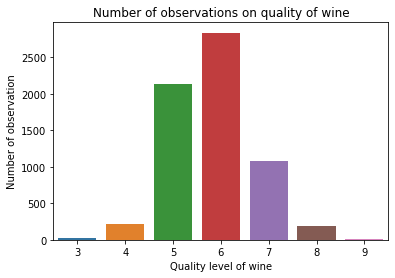

In [ ]:
sns.countplot(x=data_df['quality'])
plt.title('Number of observations on quality of wine')
plt.xlabel('Quality level of wine')
plt.ylabel('Number of observation')
plt.show()

## **Bivariate Analysis**
Bivariate Analysis works by examining the effects of a two variables on a set of data.Primarily, Bivariate Analysis simply takes two data and provides a summary or associated patterns and relationships with these datas.

Bivariate Analysis performed in this EDA sheet:
1. Grouped bar chart
2. Scatterplot
3. Lineplot


### 1. Grouped bar charts
Grouped bar charts shows the barchart for the second categorical variable side-by-side.

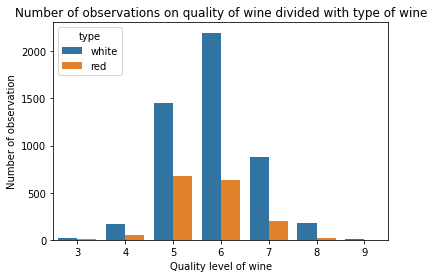

In [ ]:
sns.countplot(x=data_df['quality'],hue=data_df['type'])
plt.title('Number of observations on quality of wine divided with type of wine')
plt.xlabel('Quality level of wine')
plt.ylabel('Number of observation')
plt.show()

Creating a separate axis to categorize the quality level of the wine into "low quality","medium quality","high quality". Categorization is done as:

*   Quality of wine lies between (3-4)------Low quality
*   Quality of wine lies between (4-7)------Medium quality
*   Quality of wine lies between (7-9)------High quality
After the categorization, we have created a separate axis called **"Quality status"**, which will help in clearer analysis of data



In [ ]:
category=pd.cut(data_df.quality,bins=[3,4,7,9],labels=['low','medium','high'])

In [ ]:
data_df.insert(13,'Quality status',category)

In [ ]:
data_df.sample(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality status
5682,red,7.101562,0.589844,0.010002,2.500000,0.077026,20.0,85.0,0.997559,3.550781,0.589844,9.796875,5,medium
6361,red,6.898438,0.629883,0.010002,2.400391,0.075989,14.0,39.0,0.995117,3.339844,0.529785,10.796875,6,medium
6473,red,7.500000,0.520020,0.399902,2.199219,0.059998,12.0,20.0,0.994629,3.259766,0.640137,11.796875,6,medium
4931,red,6.898438,0.604980,0.119995,10.703125,0.072998,40.0,83.0,0.999512,3.449219,0.520020,9.398438,6,medium
6187,red,7.000000,0.600098,0.300049,4.500000,0.067993,20.0,110.0,0.999023,3.300781,1.169922,10.203125,5,medium
4280,white,5.699219,0.219971,0.199951,16.000000,0.044006,41.0,113.0,0.998535,3.220703,0.459961,8.898438,6,medium
3355,white,5.300781,0.320068,0.229980,9.648438,0.026001,26.0,119.0,0.991699,3.179688,0.529785,12.203125,6,medium
5541,red,9.500000,0.589844,0.439941,2.300781,0.070984,21.0,68.0,0.999023,3.460938,0.629883,9.500000,5,medium
1719,white,5.800781,0.229980,0.270020,1.799805,0.042999,24.0,69.0,0.993164,3.380859,0.310059,9.398438,6,medium
2028,white,8.898438,0.209961,0.340088,7.101562,0.036987,33.0,150.0,0.996094,3.099609,0.449951,9.703125,6,medium


### 1. Grouped bar charts
Grouped bar charts shows the barchart for the second categorical variable side-by-side.

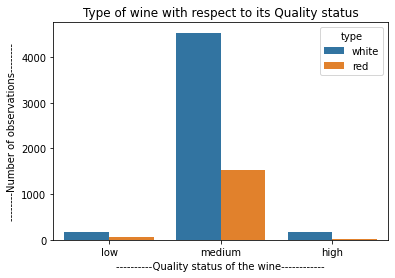

In [ ]:
sns.countplot(x=data_df['Quality status'],hue=data_df['type'])
plt.title('Type of wine with respect to its Quality status')
plt.xlabel('----------Quality status of the wine------------')
plt.ylabel('--------Number of observations--------')
plt.show()

## 2. Scatterplot
A scatterplot is a useful summary of a set of bivariate data (two variables), usually drawn before working out a linear correlation coefficient or fitting a regression line.It is used to show the relationship between two variables. In this case,

1.   Quality of the wine
2.   Fixed acidity

Since, this graph did not provide a clear indication, we will discuss the relationship between variables with other more effective charts.

Text(0.5, 1.0, 'Scattered plot for the fixed acidity and qualit of wine')

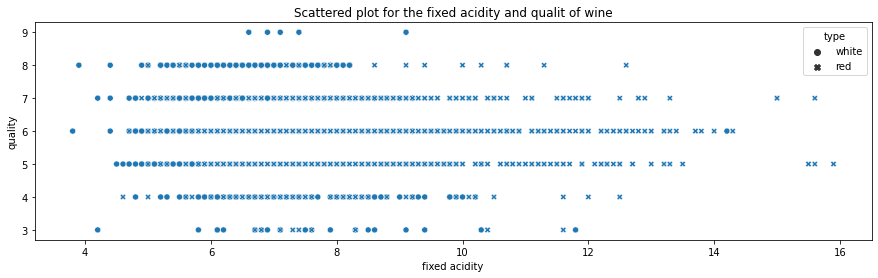

In [ ]:
plt.figure(figsize=(15,4))
ax=sns.scatterplot(x='fixed acidity',y='quality',style='type',data=data_df)
plt.title("Scattered plot for the fixed acidity and qualit of wine")

### 3. Lineplot
It is a data visualization technique that represents the relation betweenn two variables plotted in a X and Y plane.

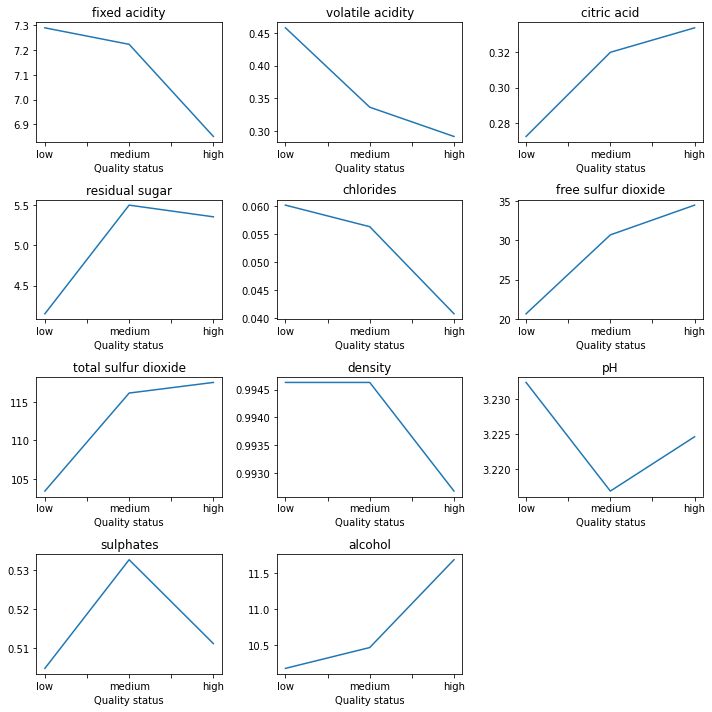

In [ ]:
plt.figure(figsize=(10,10))
for j,column in enumerate(list(data_df.columns[1:12])):
  plt.subplot(4,3,j+1)
  data_df.groupby('Quality status')[column].mean().plot()
  plt.title(column)
  plt.tight_layout()

## Multivariate Analysis
Multivariate Analysis works by examining the effects of a multiple variables on a set of data.Primarily, Multivariate Analysis simply takes multiple data and provides a summary or associated patterns and relationships with these datas.

Multivariate Analysis performed in this EDA sheet:
1. Heatmap


### 1. Heatmap
A heatmap is a data visualisation technique that shows the relationship between multiple variables in various shades.

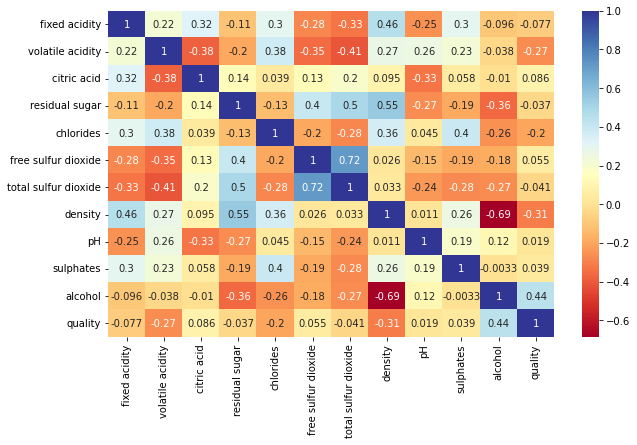

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.heatmap(data_df.corr(),cmap='RdYlBu',annot=True)

Variables that has **negative** correlation with the quality of the wine:
1.   Fixed acidity, volatile acidity, residual sugar, chlorides, total sulphur dioxide, density

Variables that has **positive** correlation with the quality of the wine:
1.   citric acid,free sulphur dioxide,pH, sulphates, alcohol





**Ideal composition of the elements to create wine quality of your choice** using mean. Mean is a central tendency distribution of the data which provides a snapshot look at the data distribution. It is also better known as the average of the data. Hence, in order to create the wine quality of your choice, you might take the mean value of the ingredients. Although, this method is not always utmost accurate.

In [ ]:
data_df.groupby('Quality status').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Quality status,,,,,,,,,,,,
low,7.289062,0.458008,0.272217,4.152344,0.060150,20.640625,103.4375,0.994629,3.232422,0.504883,10.179688,4.000000
medium,7.222656,0.336182,0.320068,5.496094,0.056305,30.703125,116.1250,0.994629,3.216797,0.532715,10.468750,5.825045
high,6.851562,0.291260,0.333984,5.351562,0.040771,34.500000,117.5000,0.992676,3.224609,0.511230,11.687500,8.025253


In [ ]:
# def normal_dist(x,mu,sigma):
#   prob_density=1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))
#   return prob_density
# mu=np.mean(data_df['fixed acidity'])
# sigma=np.std(data_df['fixed acidity'])
# density=normal_dist(data_df['fixed acidity'],mu,sigma)
# plt.plot(data_df['fixed acidity'],density)
